# Notebook to plot stimulation protocols and an example trace
Author:         Bjarne Schultze <br>
Last modified:  29.11.2023

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import h5py

# Use my own plot style
plt.style.use('./plotstyle_bjarne.mplstyle')  
# Define two colors indicating activation and inactivation
act_col = '#DB0D55'
iact_col = '#5B9403'

## Plot the stimulation protocols

In [2]:
# Open the file containg the data
data_in = h5py.File('stim_exp_data.hdf5', 'r')
# Extrac the data
stim_vec = np.array(data_in['stim_vec'])
stim_time = np.array(data_in['stim_time'])
exp_trace = np.array(data_in['example_trace'])
time_vec = np.array(data_in['example_time'])
# Close file
data_in.close()

Text(0.08, 0.5, 'light intensity [mW/cm$^2$]')

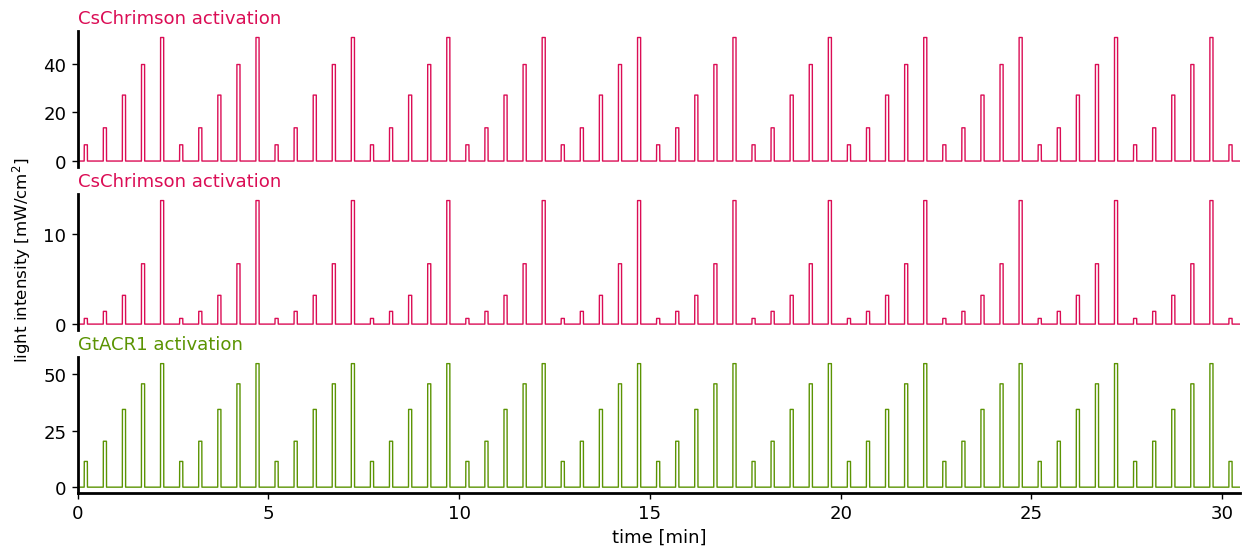

In [3]:
# Create a new figure with subplots
fig, ax = plt.subplots(stim_vec.shape[0], 1, figsize=(15,6))

# Iterate over all different stimulation protocols
for idx,stim in enumerate(stim_vec): 
    # Distinguish between activation and inactivation
    if idx < 2:
        stim_col = act_col
        title_text = 'CsChrimson activation'
    else:
        stim_col = iact_col
        title_text = 'GtACR1 activation'

    # Plot the stimulation protocol and modify the axis appearance 
    ax[idx].plot(stim_time, stim, color=stim_col)
    ax[idx].autoscale(tight=True, axis='x')
    ax[idx].set_title(title_text, loc='left', color=stim_col)

    # Remove the axes spines and increase the axes line width
    if idx < stim_vec.shape[0]-1:
        ax[idx].set_xticks([])
        ax[idx].spines[['top','right','bottom']].set_visible(False)
        ax[idx].spines['left'].set_linewidth(2)
    else:
        ax[idx].spines[['top','right']].set_visible(False)
        ax[idx].spines[['left','bottom']].set_linewidth(2)

# Label the x axis
ax[-1].set_xlabel('time [min]')
fig.supylabel(r'light intensity [mW/cm$^2$]', x=0.08)

# Save the figure
# fig.savefig('./Report/figures/stimulation_protocols.eps', bbox_inches='tight')

## Plot an example trace

In [4]:
# Load the power/rms analysis data
power_analysis = pd.read_pickle("./rms_analysis_data.pkl")

##### Example trace with stimulation marked

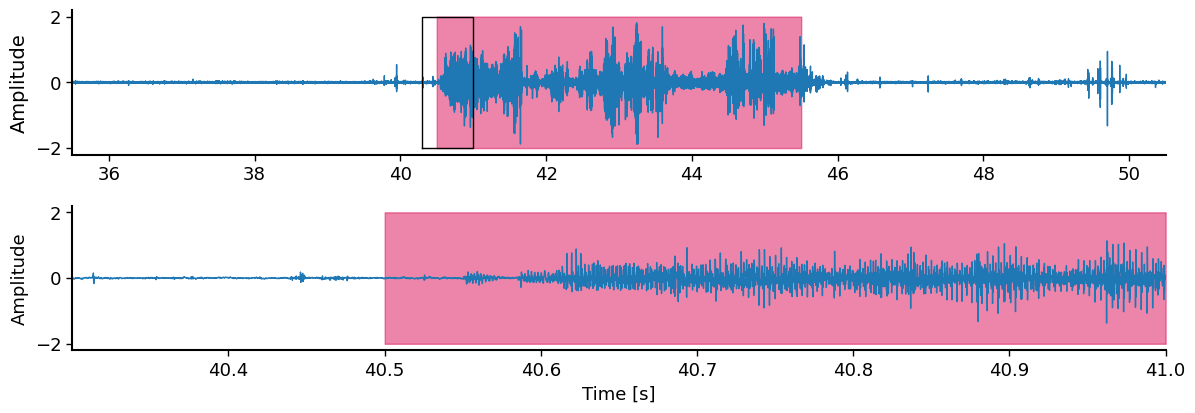

In [5]:
# Create a new figure
fig1, ax1 = plt.subplots(2, 1, figsize=(12,4))
# Select a cutout as an example and the region corresponding to stimulation
cutout = list(range(355001,505001))
cutout_stim = list(range(power_analysis.at[0,'stim_on'][1],power_analysis.at[0,'stim_off'][1]))

# Plot the example cutout and shade the part during stimulation
ax1[0].fill_between(time_vec[cutout_stim],-2, 2, alpha=0.5, color=act_col)
ax1[0].plot(time_vec[cutout], exp_trace[cutout,1])
# Adjust plot layout
ax1[0].set_ylabel("Amplitude", fontsize=14)
ax1[0].autoscale(axis='x', tight=True)
plt.tight_layout()

# Create a new cutout for a zoom-in of the first one
cutout = list(range(power_analysis.at[0,'stim_on'][1]-2000, 410001))
cutout_stim = list(range(power_analysis.at[0,'stim_on'][1], 410001))

# Plot the new cutout and shade the region of stimulation
ax1[1].fill_between(time_vec[cutout_stim],-2, 2, alpha=0.5, color=act_col)
ax1[1].plot(time_vec[cutout], exp_trace[cutout,1])

# Mark the cutout region in the first subplot
ax1[0].plot(time_vec[np.array([cutout[0],cutout[-1],cutout[-1],cutout[0],cutout[0]])], [-2,-2,2,2,-2], 'k-')
# Adjust the axes
ax1[1].set_xlabel("Time [s]")
ax1[1].set_ylabel("Amplitude")
ax1[1].autoscale(axis='x', tight=True)

# Save the figure
# fig1.savefig("./Report/figures/example_trace.pdf", bbox_inches='tight')

##### Example trace with RMS curve overlayed 

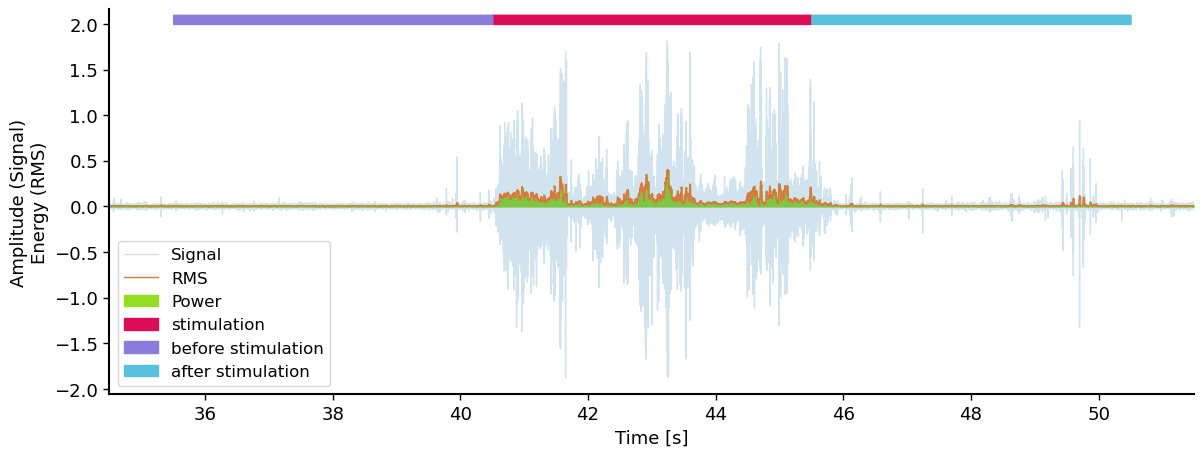

In [6]:
# Select a stimulus
stim = 1
# Calculate the stimulus length
stim_len = power_analysis.at[0,'stim_off'][stim] - power_analysis.at[0,'stim_on'][stim]

# Define a cutout as an example
cutout = list(range(power_analysis.at[0,'stim_on'][stim]-round(1.2*stim_len), power_analysis.at[0,'stim_off'][stim]+round(1.2*stim_len)))
cutout_stim = list(range(power_analysis.at[0,'stim_on'][stim],power_analysis.at[0,'stim_off'][stim]))
cutout_pre = list(range(power_analysis.at[0,'stim_on'][stim]-stim_len,power_analysis.at[0,'stim_on'][stim]))
cutout_post = list(range(power_analysis.at[0,'stim_off'][stim],power_analysis.at[0,'stim_off'][stim]+stim_len))

# Create a new figure
fig2, ax2 = plt.subplots(1, 1, figsize=(14,5))

# Plot the audio signal cutout with the corresponding RMS overlayed
ax2.plot(time_vec[cutout], exp_trace[cutout,1], label='Signal', alpha=0.2)
ax2.plot(time_vec[cutout], power_analysis.at[0,'rms'][cutout], label='RMS', color='#DB783F')

ax2.fill_between(time_vec[cutout], 0, power_analysis.at[0,'rms'][cutout], color='#96DB24', label='Power')
ax2.fill_between(time_vec[cutout_stim], 2, 2.1, color=act_col, label='stimulation')
ax2.fill_between(time_vec[cutout_pre], 2, 2.1, color='#8B7BDB', label='before stimulation')
ax2.fill_between(time_vec[cutout_post], 2, 2.1, color='#59C0DB', label='after stimulation')

# Adjust the axes appearance
ax2.set_ylim([-2.06,2.16])
ax2.autoscale(axis='x', tight=True)
ax2.set_xlabel("Time [s]")
ax2.set_ylabel("Amplitude (Signal)\nEnergy (RMS)")
ax2.legend(loc='lower left')

# Save the figure
# fig2.savefig("./Report/figures/signal_rms_example.pdf", bbox_inches='tight')